<a href="https://colab.research.google.com/github/s2ul2/This-is-coding-test-with-Python/blob/main/%EB%8B%A4%EC%9D%B4%EB%82%98%EB%AF%B9_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D_(DP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chap 8

## 다이나믹 프로그래밍 : 점화식 구하는 것이 중요

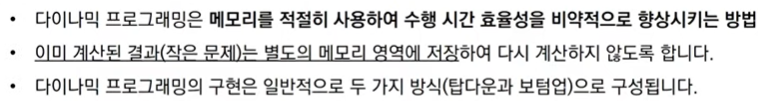

## 언제 사용할까?

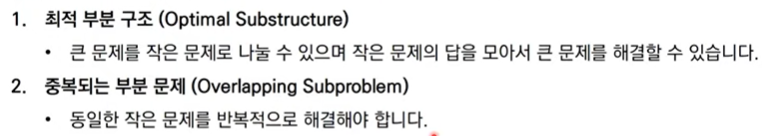

## 탑다운(하향식) vs 보텀업(상향식)
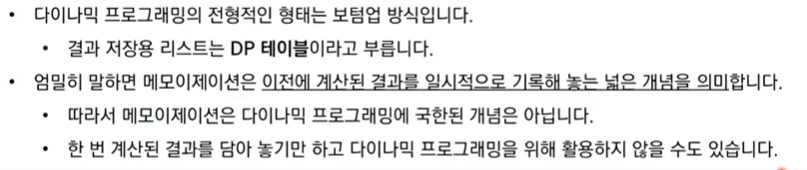

## 탑다운(하향식) 방법 (재귀함수 사용) : 큰것에서 작은것으로

### 메모이제이션
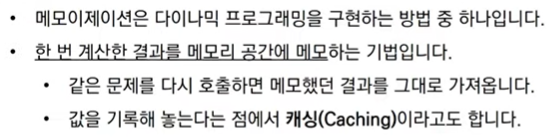

In [ ]:
# 한 번 계산된 결과를 메모이제이션(Memoization)하기 위한 리스트 초기화
d = [0] * 100

# 피보나치 함수(Fibonacci Function)를 재귀함수로 구현 (탑다운 다이나믹 프로그래밍)
def fibo(x):
    # 종료 조건(1 혹은 2일 때 1을 반환)
    if x == 1 or x == 2:
        return 1
    # 이미 계산한 적 있는 문제라면 그대로 반환
    if d[x] != 0:
        return d[x]
    # 아직 계산하지 않은 문제라면 점화식에 따라서 피보나치 결과 반환
    d[x] = fibo(x - 1) + fibo(x - 2)
    return d[x]

print(fibo(99))

## 보텀업(상향식) 방법 ( 반복문 사용 ) : 작은것에서 큰것으로

In [ ]:
 # 앞서 계산된 결과를 저장하기 위한 DP 테이블 초기화
d = [0] * 100

# 첫 번째 피보나치 수와 두 번째 피보나치 수는 1
d[1] = 1
d[2] = 1
n = 99

# 피보나치 함수(Fibonacci Function) 반복문으로 구현(보텀업 다이나믹 프로그래밍)
for i in range(3, n + 1):
    d[i] = d[i - 1] + d[i - 2]

print(d[n])

## 다이나믹 프로그래밍 문제 접근 방법
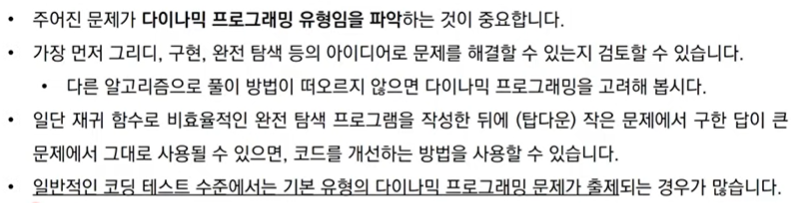

## 1로 만들기 : 해결 X,, 어렵다

In [15]:
n = int(input())
cnt = 0
while n != 1:
    res_lst = [n%5, n%3, n%2]
    min_num = res_lst.index(min(res_lst))

    if n % 5 == 0:
        n = n // 5
    elif n % 3 == 0:
        n = n // 3
    elif n% 2 == 0:
        n = n // 2
    else:
        n -= 1
    cnt+=1
print(cnt)
 

KeyboardInterrupt: ignored

### 책 풀이

In [ ]:
f(6) -> f(5) -> f(4)
                f(1)

* 그리디로 해결 X
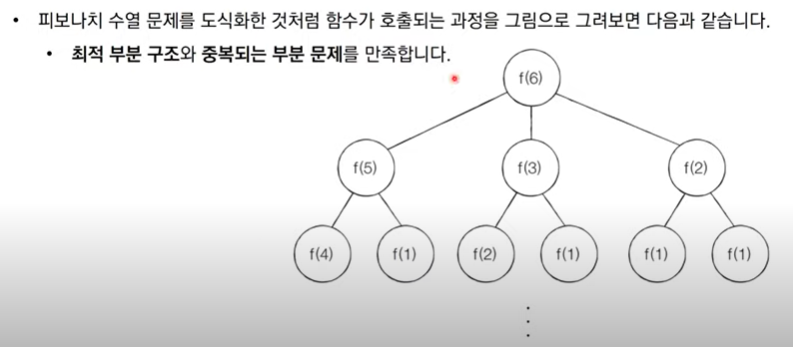

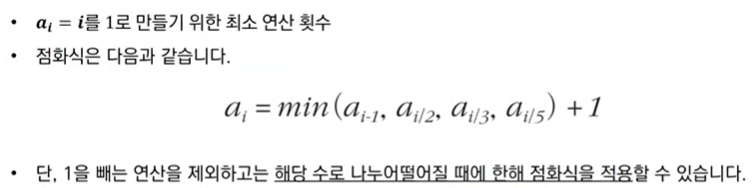

x = 6일 때 

1. x=5일때 1을 더해서 6을 만드는 방법
2. x=3일때 2를 곱해서 6을 만드는 방법
3. x=2일때 3을 곱해서 6을 만드는 방법

이렇게 총 3가지로 나뉠 수 있고 이 세 방법 중에서 값이 작은 것을 선택하게 된다. (6은 5로 나눠떨어지지 않으므로 5를 곱해서 6 만드는 방법은 X)

이 때 x = 5일때 x = 3일때 x = 2일때도 마찬가지로 부분 구조로 나뉠 수 있고 각각의 값을 구할 수 있다.

* dp(6) 구하는 과정
1. dp(6) -> min( dp(5), dp(3) dp(2) ) + 1 = 2 -> dp[6] = 2
2. dp(5) ->  min( dp(4) dp(1) ) + 1 = dp(1) + 1 = 2 -> dp[5] = 1
3. dp(4) -> min ( dp(3), dp(2) ) + 1 = 2 -> dp[4] = 2
4. dp(3) -> min(dp(2), dp(1)) + 1 = dp(1) + 1 = 1 -> dp[3] = 1
5. dp(2) ->min(dp(1)) + 1 = dp[2] = 1
6. dp(1) -> return 0

In [19]:
# 직접해보기 : 재귀 (하향식 방식)
n = int(input())
num_lst = [0 * i for i in range(n+1)]

def dp(n):
    if n == 1:
        return num_lst[n]
    else:
        if num_lst[n] != 0:
            return num_lst[n]

    num_lst[n] = dp(n-1)
    if n % 2 == 0:
        num_lst[n] = min(num_lst[n], dp(n//2))
    if n % 3 == 0:
        num_lst[n] = min(num_lst[n], dp(n//3))
    if n % 5 == 0:
        num_lst[n] = min(num_lst[n], dp(n//5))
    num_lst[n] += 1
    return num_lst[n]

dp(n)



6


2

In [ ]:
# 책 답안 (반복문 : 상향식)
# 정수 X를 입력 받기
x = int(input())

# 앞서 계산된 결과를 저장하기 위한 DP 테이블 초기화
d = [0] * 1000001

# 다이나믹 프로그래밍(Dynamic Programming) 진행(보텀업)
for i in range(2, x + 1):
    # 현재의 수에서 1을 빼는 경우
    d[i] = d[i - 1] + 1
    # 현재의 수가 2로 나누어 떨어지는 경우
    if i % 2 == 0:
        d[i] = min(d[i], d[i // 2] + 1)
    # 현재의 수가 3으로 나누어 떨어지는 경우
    if i % 3 == 0:
        d[i] = min(d[i], d[i // 3] + 1)
    # 현재의 수가 5로 나누어 떨어지는 경우
    if i % 5 == 0:
        d[i] = min(d[i], d[i // 5] + 1)

print(d[x])

## 개미 전사 : 못풂 ,,

In [ ]:
n = int(input())
store_lst = list(map(int, input().split()))
store_dict = dict()
for i, store in enumerate(store_lst):
    store_dict[i] = store
for i in range(2, n//2 + 1):


# 0: 1, 1: 100000, 2: 3, 3 : 5000, 4 : 4

# 정렬 (1, 10000) (3, 5000) (4, 4) (2, 3) (0, 1)


# 1개 뽑을 때 최댓값 : 10000
# 2개 뽑을 때 최댓값 : 1개 뽑을 때 최댓값 + 

mem_lst = [0] * n
for i in range(1, n+1):


### 책 풀이

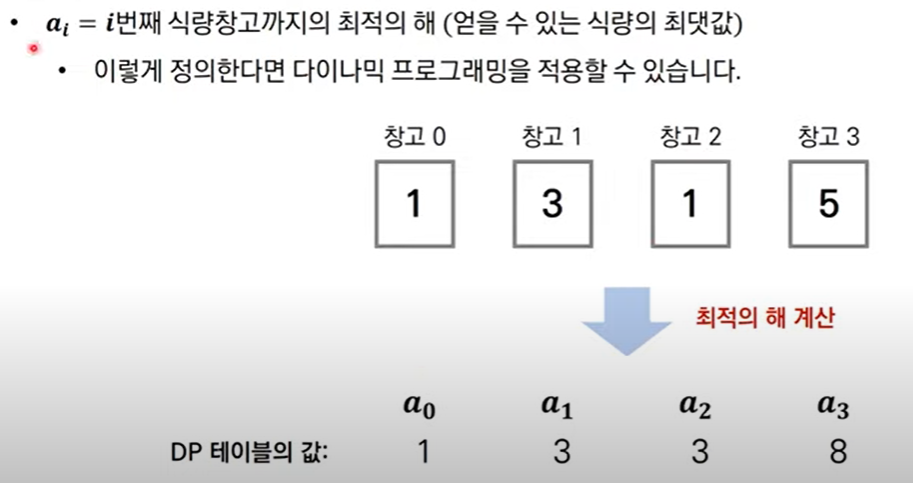

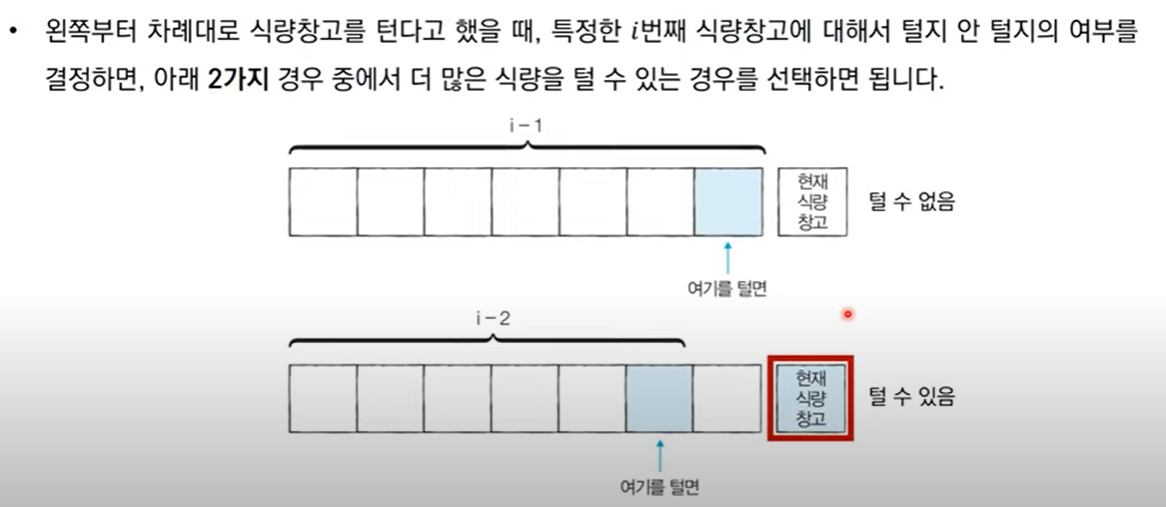

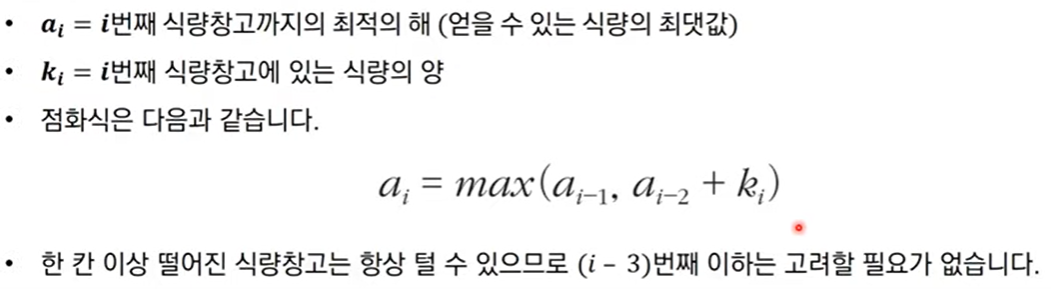

a(i-1) : i-1번째 식량창고까지의 최적의 해(즉 i-1번째 식량창고도 털었으므로, 이 경우 i번째 식량창고 털 수 X)

a(i-2) : i-2번째 식량창고까지의 최적의 해 (즉 i-2번째 식량창고를 털었으므로 이 경우 i번째 식량창고 털 수 O)

* 교재 예시 [1, 3, 1, 5]
1. a[1] = 1
2. a[2] = 3
3. a[3] = max(a[2], a[1] + 1) = a[2] = 3
4. a[4] = max(a[3], a[2] + 5) a[2] + 5 = 8 

In [22]:
n = int(input())
store_lst = list(map(int, input().split()))

max_lst = [0] * n

max_lst[0], max_lst[1] = store_lst[0], store_lst[1]
for i in range(2, n):
    max_lst[i] = max(max_lst[i-1], max_lst[i-2] + store_lst[i])
print(max_lst[n-1])

4
1 3 1 5
8


## 바닥 공사 : 해결 o (오래 걸림)

In [2]:
# 가로 : n, 세로 : 2
n = int(input())
# 1번상자 : 가로=2 / 세로=1 (넓이 = 2) --> 1번상자는 추가할 때 무조건 2개씩 추가됨.  즉 3번상자랑 같은 역할. --> 고려 X
# 2번상자 : 가로=1 / 세로=2 (넓이 = 2)  -> 2번상자 추가 조건 : 가로길이 >= 1
# 3번상자 : 가로=2 / 세로=2 (넓이 = 4), 3번상자 하나 추가 == 1번상자 추가 두번추가되는 것 --> 횟수 두번 세기
#                                               가로길이 3
#                            가로길이2 + 2번상자             가로길이1 + 3번상자
#                                  가로길이2                         가로길이1 (2번상자)
#                          *3번상자    가로길이1(2번상자) + 2번상자            
#                                                                     

mem_lst = [0] * (n+1) # 가로 길이 i 를 만들 때 몇가지 방법이 필요한지
mem_lst[1] = 1 # 가로 1은 2번상자 하나로만 만들 수 있으므로 --> 가로 1 만드는 방법 : 1가지
mem_lst[0] = 1
for i in range(2, n+1):
    mem_lst[i] = mem_lst[i-1] + 2*mem_lst[i-2] # 가로가 i-1인 상자에 2번상자 하나만 추가하는 경우 가짓수는 mem_lst[i-1]과 동일, 가로가 i-2인 상자에 3번상자 하나만 추가하는 경우는 mem_lst[i-2]에 2배 해야한다.
print(mem_lst[n] % 796796)
# 2번 상자 추가할 때는 그냥 f(i-1) 개수와 같음
# 3번 상자 추가할 때는 f(i-2) * 2
# f(2) = f(1) + f(0) * 2 = 1 + 2 = 3
# f(3) = f(2) + f(1) * 2 = 3 + 2 = 5

3
5


점화식 : a(i) = a(i-1) + 2 * a(i-2)

## 효율적인 화폐 구성 : 해결 o (오래걸림)

In [13]:
n,m = map(int, input().split())
coin_lst = []
for i in range(n):
    coin_lst.append(int(input()))
coin_lst.sort()

#                                        15
#                               13              12
#                            11   10          10    9
#                        9     8  8   7    8    7  7   6
#                     7   6  6 5 6 5 5 4  6 5  5 4 5 4 4 3
#                                                        1 0
#

#                               4
#                          1    -1    -3
#   a(15) = min(a(13), a(12))       
#    a(i) = min(a(i-2), a(i-3))            
mem_lst = [0] * (m+1)

for i in range(min(coin_lst) + 1, m+1):
    if i in coin_lst:
        mem_lst[coin] = 1
    if i not in coin_lst:
        possible_lst = []
        for coin in coin_lst:
            if mem_lst[i - coin] != 0 :
                possible_lst.append(mem_lst[i-coin])
        if possible_lst != []:
            mem_lst[i] = min(possible_lst) + 1

if mem_lst[m] == 0:
    print(-1)
else:
    print(mem_lst[m])



2 15
2
3
5


### 책 풀이

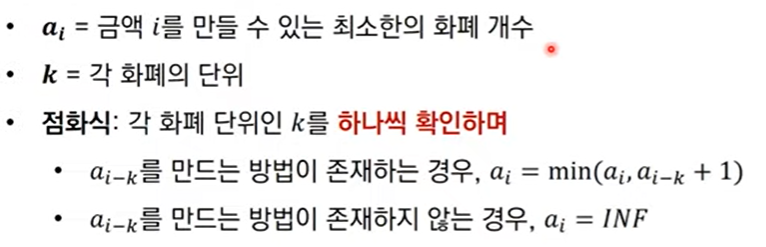

In [ ]:
# 정수 N, M을 입력 받기
n, m = map(int, input().split())
# N개의 화폐 단위 정보를 입력 받기
array = []
for i in range(n):
    array.append(int(input()))

# 한 번 계산된 결과를 저장하기 위한 DP 테이블 초기화
d = [10001] * (m + 1)

# 다이나믹 프로그래밍(Dynamic Programming) 진행(보텀업)
d[0] = 0 # 0번째는 0으로 초기화
for i in range(n):
    for j in range(array[i], m + 1):
        if d[j - array[i]] != 10001: # (i - k)원을 만드는 방법이 존재하는 경우
            d[j] = min(d[j], d[j - array[i]] + 1)

# 계산된 결과 출력
if d[m] == 10001: # 최종적으로 M원을 만드는 방법이 없는 경우
    print(-1)
else:
    print(d[m])

* 나는 mem 초기화를 0으로 했는데 책에서는 초깃값을 10001로 두었음. 따라서 나는 possible 이라는 리스트를 하나 더 만들어서 최솟값을 찾았는데 책처럼 10001로 초기화하면 리스트 만들 필요없이 그냥 min으로 값을 구할 수 있다. 이게 더 좋은방법일듯.

# Chap 16

## 금광 : 해결 (1시간)


In [32]:
# 큐 사용,,

# 1 3 3 2
# 2 1 4 1
# 0 6 4 7


# 1 3 1 5
# 2 2 4 1
# 5 0 2 3
# 0 6 1 2
from collections import deque


n, m = map(int, input().split())
user_input = list(map(int, input().split()))
matrix = []
for i in range(n):
    row  = []
    for j in range(i*m, i*m+m):
        row.append(user_input[j])
    matrix.append(row)

# memory 행렬
mem_matrix = [[0] * m for i in range(n)]

# 방향벡터
# 오른쪽위, 오른쪽, 오른쪽 아래
di_lst = [-1, 0, 1]
dj_lst = [1, 1, 1]

# 첫번째 열의 mem값은 각 위치의 금광 값으로 초기화
for i in range(n):
    mem_matrix[i][0] = matrix[i][0]

# 점화식 : 범위를 모두 만족하는 경우 a(i, j) = max(a(i-1, j-1), a(i, j-1), a(i+1, j-1) ) + k(i, j)
i, j = 0, 0

for start_i in range(n):
    q = deque([[start_i, 0]])
    while q:
        i, j = q.popleft()
        for di, dj in zip(di_lst, dj_lst):
            ni = i + di # n
            nj = j + dj # m
            if ni >= 0 and ni < n and nj >= 0 and nj < m: # 범위를 만족한다면
                q.append([ni, nj])
                mem_matrix[ni][nj] = max(mem_matrix[ni][nj], mem_matrix[i][j] + matrix[ni][nj])
                print(ni, nj)
                for row in mem_matrix:
                    print(row)
                print('-------------------------------------------------------')


#mem_matrix               
max(list(map(max, mem_matrix)))

4 4
1 3 1 5 2 2 4 1 5 0 2 3 0 6 1 2
0 1
[1, 4, 0, 0]
[2, 0, 0, 0]
[5, 0, 0, 0]
[0, 0, 0, 0]
-------------------------------------------------------
1 1
[1, 4, 0, 0]
[2, 3, 0, 0]
[5, 0, 0, 0]
[0, 0, 0, 0]
-------------------------------------------------------
0 2
[1, 4, 5, 0]
[2, 3, 0, 0]
[5, 0, 0, 0]
[0, 0, 0, 0]
-------------------------------------------------------
1 2
[1, 4, 5, 0]
[2, 3, 8, 0]
[5, 0, 0, 0]
[0, 0, 0, 0]
-------------------------------------------------------
0 2
[1, 4, 5, 0]
[2, 3, 8, 0]
[5, 0, 0, 0]
[0, 0, 0, 0]
-------------------------------------------------------
1 2
[1, 4, 5, 0]
[2, 3, 8, 0]
[5, 0, 0, 0]
[0, 0, 0, 0]
-------------------------------------------------------
2 2
[1, 4, 5, 0]
[2, 3, 8, 0]
[5, 0, 5, 0]
[0, 0, 0, 0]
-------------------------------------------------------
0 3
[1, 4, 5, 10]
[2, 3, 8, 0]
[5, 0, 5, 0]
[0, 0, 0, 0]
-------------------------------------------------------
1 3
[1, 4, 5, 10]
[2, 3, 8, 6]
[5, 0, 5, 0]
[0, 0, 0, 0]
----------

16

### 책 풀이

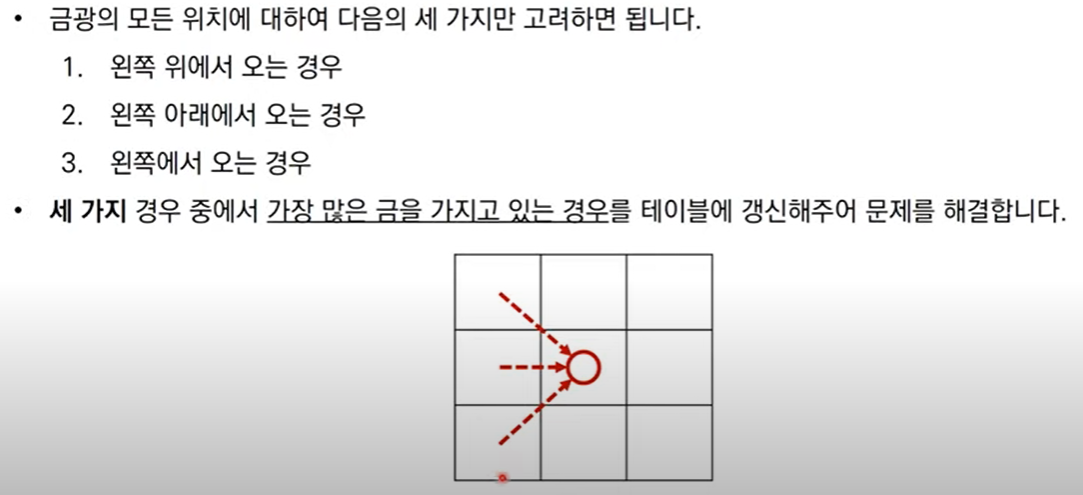

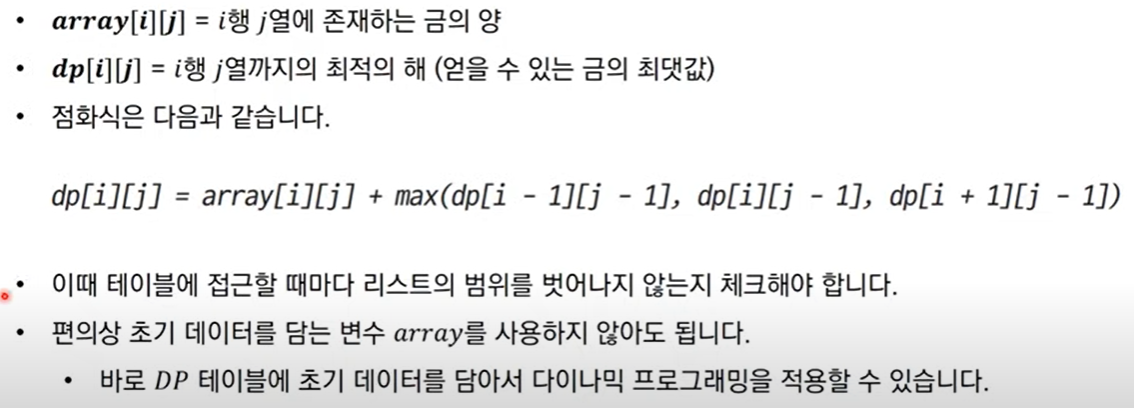

In [ ]:
# 테스트 케이스(Test Case) 입력
for tc in range(int(input())):
    # 금광 정보 입력
    n, m = map(int, input().split())
    array = list(map(int, input().split()))

    # 다이나믹 프로그래밍을 위한 2차원 DP 테이블 초기화
    dp = []
    index = 0
    for i in range(n):
        dp.append(array[index:index + m])
        index += m

    # 다이나믹 프로그래밍 진행
    for j in range(1, m):
        for i in range(n):
            # 왼쪽 위에서 오는 경우
            if i == 0:
                left_up = 0
            else:
                left_up = dp[i - 1][j - 1]
            # 왼쪽 아래에서 오는 경우
            if i == n - 1:
                left_down = 0
            else:
                left_down = dp[i + 1][j - 1]
            # 왼쪽에서 오는 경우
            left = dp[i][j - 1]
            dp[i][j] = dp[i][j] + max(left_up, left_down, left)

    result = 0
    for i in range(n):
        result = max(result, dp[i][m - 1])

    print(result)

## 정수 삼각형 : 해결 o (26분 50초)

In [4]:
n = int(input())
tri_lst = []
# 방향벡터 : 대각선 왼쪽 , 대각선 오른쪽
di_lst = []
dj_lst = []


for i in range(n):
    tri_lst.append(list(map(int, input().split())))
tri_lst

# [0,0]                                                 7
# [1, 0] [1, 1]                                        3 8
# [2, 0] [2, 1] [2, 2]                                8 1 0 
# [3, 0] [3, 1] [3, 2] [3, 3]                        2 7 4 4
# [4, 0] [4, 1] [4, 2] [4, 3] [4, 4]                4 5 2 6 5
# [5, 0] [5, 1] [5, 2] [5, 3]

# 대각선 왼쪽 : [i-1][j-1]
# 대각선 오른쪽 : [i-1][j]
# 점화식 : a[i][j] = a[i][j] + max(a[i-1][j-1], a[i-1][j])
# 위에서 아래로
mem_lst = []
# mem_lst 0으로 초기화
for i in range(n):
    mem_lst.append([0] * len(tri_lst[i]))
mem_lst[0][0] = tri_lst[0][0]

for i in range(1, n):
    for j in range(len(tri_lst[i])):
        if j-1 < 0:   # 이때 i-1은 0보다 작은값이 나올 수 없음 i는 1이상에서 시작하므로
            left = 0
        else:
            left = mem_lst[i-1][j-1]
        if j == len(tri_lst[i]) - 1: # 대각선 오른쪽의 j인덱스는 현재 row의 j 인덱스보다 1작으므로 대각선 오른쪽에서 올 수 없음.
            right = 0
        else:
            right = mem_lst[i-1][j]
        
        mem_lst[i][j] = tri_lst[i][j] + max(left, right)
max(list(map(max, mem_lst)))

5
7
3 8
8 1 0
2 7 4 4
4 5 2 6 5


30

### 책 풀이


In [ ]:
n = int(input())
dp = [] # 다이나믹 프로그래밍을 위한 DP 테이블 초기화

for _ in range(n):
    dp.append(list(map(int, input().split())))

# 다이나믹 프로그래밍으로 2번째 줄부터 내려가면서 확인
for i in range(1, n):
    for j in range(i + 1):
        # 왼쪽 위에서 내려오는 경우
        if j == 0:
            up_left = 0
        else:
            up_left = dp[i - 1][j - 1]
        # 바로 위에서 내려오는 경우
        if j == i:
            up = 0
        else:
            up = dp[i - 1][j]
        # 최대 합을 저장
        dp[i][j] = dp[i][j] + max(up_left, up)

print(max(dp[n - 1]))

## 퇴사 : 해결 o (오래 걸림)

In [27]:
n = int(input())
work_lst = [[0, 0]] # 0번째 값은 (0, 0)으로 초기화
for i in range(n):
    work_lst.append(list(map(int, input().split())))

# mem_lst : 각 일자별로 얻을 수 있는 최대 금액
mem_lst = [0] * 1000
# 점화식 : 셋째날 상담 소요시간이 3일이고 이때 pay는 20이라고 가정. --> 셋째날 상담을 하게 되면 5일째에 상담이 완료됨.--> 5일째 되는날 벌수있는 최대 금액은 (둘째날까지 벌수 있는 최대 금액 + pay:20)과 (기존 5일째 되는날 벌수있는 금액)의 최댓값이 된다.
# 점화식 : mem_lst[day + work_lst[day][0] - 1] = max(max(mem_lst[:day]) + work_lst[day][1], mem_lst[day + work_lst[day][0] - 1])
# 첫째날 원소 : [3, 10] --> mem_lst[1+3-1] = max(m[0]+10, m[3]) = m[3] = 10  -> work_lst[4][0] : 넷째날 일거리 -> mem_lst[4 + work_lst[4][0] -1] = max(m[3]+work_lst[4][1], m[4 + work_lst[4][0] -1])
# 둘째날 원소 : [5, 20] --> mem_lst[2+5-1] = max(m[1]+20, ~~) = m[6] = 20
# 셋째날 원소 : [1, 10] --> m[3 + 1 - 1] = max(m[2]+10, m[3]) = m[3] = 10
# 넷째날 원소 : [1, 20]  -> m[4 + 1 - 1] = max(m[3]+20, m[4]) = m[4] = 30
# 다섯번째 원소 : [2, 15] -> m[5 + work_lst[5][0] - 1] = m[5+2-1] = m[6] = max(m[4] + work_lst[5][1], m[6]) = m[6] = 45

for day in range(1, len(work_lst)):

    mem_lst[day + work_lst[day][0] - 1] = max(max(mem_lst[:day]) + work_lst[day][1], mem_lst[day + work_lst[day][0] - 1])


max(mem_lst[:n+1])

10
5 10
5 9
5 8
5 7
5 6
5 10
5 9
5 8
5 7
5 6


20

### 책 풀이

In [ ]:
n = int(input()) # 전체 상담 개수
t = [] # 각 상담을 완료하는데 걸리는 기간
p = [] # 각 상담을 완료했을 때 받을 수 있는 금액
dp = [0] * (n + 1) # 다이나믹 프로그래밍을 위한 1차원 DP 테이블 초기화
max_value = 0

for _ in range(n):
    x, y = map(int, input().split())
    t.append(x)
    p.append(y)

# 리스트를 뒤에서부터 거꾸로 확인
for i in range(n - 1, -1, -1):
    time = t[i] + i
    # 상담이 기간 안에 끝나는 경우
    if time <= n:
        # 점화식에 맞게, 현재까지의 최고 이익 계산
        dp[i] = max(p[i] + dp[time], max_value)
        max_value = dp[i]
    # 상담이 기간을 벗어나는 경우
    else:
        dp[i] = max_value

print(max_value)

## 병사 배치하기 : 해결 o (1시간 초과)

In [14]:
# 앞쪽에 있는 병사의 전투력 > 뒤쪽에 있는 병사의 전투력
n = int(input())
power_lst = list(map(int, input().split()))
sort_lst = sorted(power_lst)
# 15 11 4 8 6 3 4 5 4 3 2 1

# 15 11 1000 999 987 986 985 984 950 100 3

# 5 9 4 2 6 8 3 11
# f(x) : X보다 작은 수의 개수

#                                       f(5)(4, 3, 2)
#                           f(4):3, 2        f(3):X           f(2) : X
#                      f(3):2      f(2):X                

#                                       f(9):4 6 2 8 3
#                      f(4):2,3    f(6):3     f(2):X   f(8):3      f(3):X
#               f(2):X   f(3):X    f(3):X              f(3):X      
#
#
#
# idx : 0 1 2 3 4 5 6 
# val : 15 11 4 8 5 2 4               
#                                                                           f(15):11 4 8 5 2 4_
#                                          f(11):4 8 5 2 4_                      f(4):2                                  f(8):5 2 4_      f(2):X      f(4_): 0
#             f(4):2          f(8):5 2 4_     f(5):2 4_     f(2):0      f(4_):           f(2):X                      f(5):2 4_       f(2):X   f(4_)
#           f(2):X      f(5):2 4_  f(2):X f(4_)
#                   f(2):X f(4_):X
#                   
# 점화식 : f(15) = max( f(11), f(4), f(8), f(5), f(2), f(4) ) + 1
#
visit_lst = [False] * n
mem_lst = [0]*n
for num in sort_lst:
    print('---------------------------------------------------')
    print('num' + str(num))
    for k in range(len(power_lst)):
        if (visit_lst[k] == False) and power_lst[k] == num:
            visit_lst[k] = True
            idx = k # num = 8 -> idx = 4
            break
    print('idx' + str(idx))
    if idx != n-1:
        isbreak = 1
        for i, power in enumerate(power_lst[idx+1:]):
            if power < num:
                isbreak = 0
                mem_lst[idx] = max(mem_lst[i+idx+1], mem_lst[idx])
                
        if isbreak == 1:
            mem_lst[idx] = 1
        else:
            mem_lst[idx] += 1
            print(mem_lst)
    else:
        mem_lst[idx] = 1
               


# sort_lst = [2, 4, 4, 5, 8, 11, 15] # 4가 중복되면 index로 찾을 때 뒤에 값 인식 못함
# num = 2 -> idx = 5 -> [4] => m[idx] = m[5] = 1
# num = 4 -> idx = 2 -> [8 5 2 4] -> i = 2, power = 2 -> m[2] = max(m[5], m[2]) + 1 => m[2] = 1
# num = 4->  idx = 6 -> m[6] = 1
# num = 5 -> idx = 4 -> [2 4] -> i = 0, power = 2 -> m[4] = max(m[4], m[5]) = 1 --> i = 1, power = 4 --> m[4] = max(m[4], m[6]) =1 -> m[4] = 2
# num = 8 -> idx = 3 -> [5, 2, 4]-> max(2, 1, 1) + 1 -> m[3] = 3
# num = 11 -> idx = 1 -> [4, 8, 5, 2, 4] -> max() + 1 -> m[1] = 4
max(mem_lst)



11
15 11 1000 999 987 986 985 984 950 100 3
---------------------------------------------------
num3
idx10
---------------------------------------------------
num11
idx1
[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1]
---------------------------------------------------
num15
idx0
[3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1]
---------------------------------------------------
num100
idx9
[3, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1]
---------------------------------------------------
num950
idx8
[3, 2, 0, 0, 0, 0, 0, 0, 3, 2, 1]
---------------------------------------------------
num984
idx7
[3, 2, 0, 0, 0, 0, 0, 4, 3, 2, 1]
---------------------------------------------------
num985
idx6
[3, 2, 0, 0, 0, 0, 5, 4, 3, 2, 1]
---------------------------------------------------
num986
idx5
[3, 2, 0, 0, 0, 6, 5, 4, 3, 2, 1]
---------------------------------------------------
num987
idx4
[3, 2, 0, 0, 7, 6, 5, 4, 3, 2, 1]
---------------------------------------------------
num999
idx3
[3, 2, 0, 8, 7, 6, 5, 4, 3, 2, 1]
-------------

9

### 책 풀이

#### LIS(가장 긴 증가하는 부분 수열)외우기!!

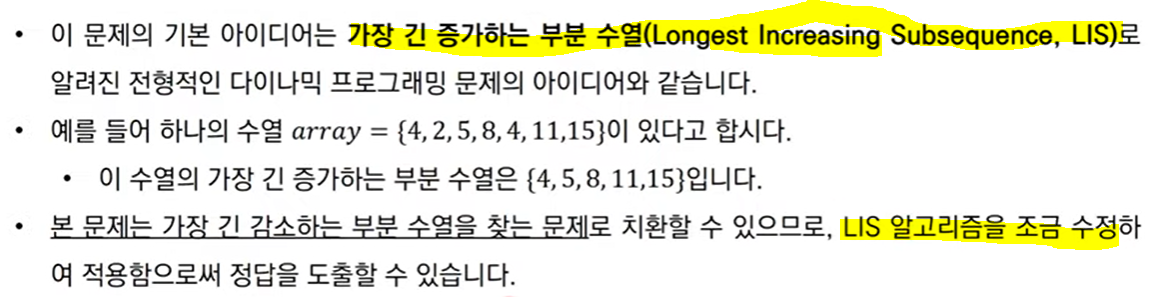

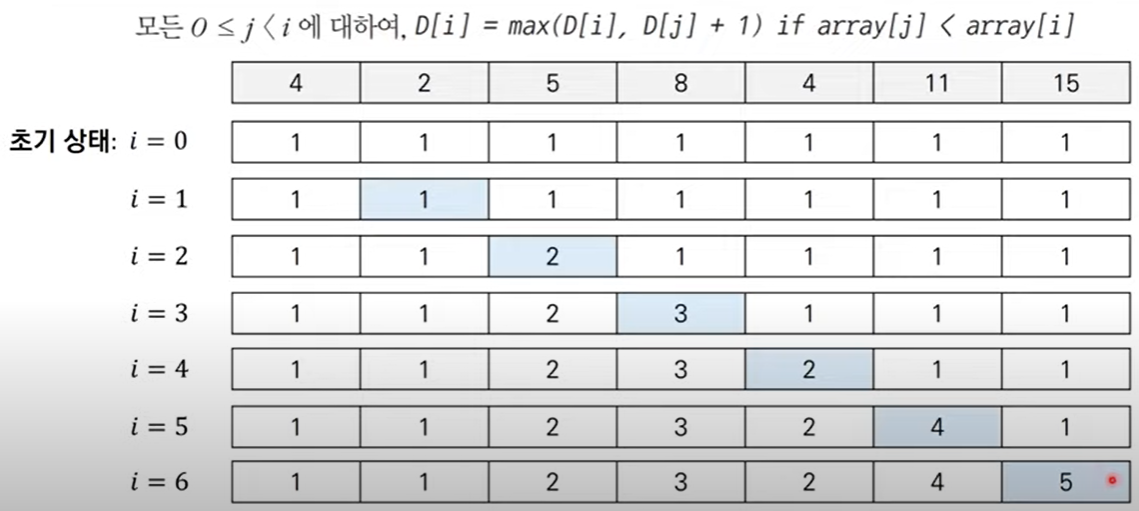

* i = 1일때 -> 가능한 j = 0 --> array[0] > array[1]이므로 D[1]은 그대로 1이됨.
* i = 2일때 -> 가능한 j = 0, 1 -> array[0] < array[2] --> D[2] = max(D[2], D[0]+1) = D[0]+1 = 2

...

* i = 5일때 -> 가능한 j = 0, 1, 2, 3, 4
* array[0] < array[5] --> D[5] = max(D[5], D[0]+1) = D[0]+1 = 2
* array[1] < array[5] --> D[5] = max(D[5], D[1]+1) = D[1]+1 = 2
* array[2] < array[5]--> D[5] = max(D[5], D[2]+1) = D[2]+1 = 3
* array[3] < array[5]--> D[5] = max(D[5], D[3]+1) = D[3]+1 = 4
* array[4] < array[5]--> D[5] = max(D[5], D[4]+1) = D[5] = 4

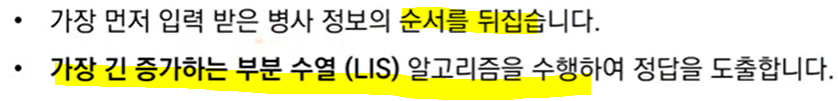

In [ ]:
n = int(input())
array = list(map(int, input().split()))
# 순서를 뒤집어 '최장 증가 부분 수열' 문제로 변환
array.reverse()

# 다이나믹 프로그래밍을 위한 1차원 DP 테이블 초기화
dp = [1] * n

# 가장 긴 증가하는 부분 수열(LIS) 알고리즘 수행
for i in range(1, n):
    for j in range(0, i):
        if array[j] < array[i]:
            dp[i] = max(dp[i], dp[j] + 1)

# 열외해야 하는 병사의 최소 수를 출력
print(n - max(dp))

## 못생긴 수 : 좋은 답 아님

In [35]:
# 못생긴 수 : 약수 중에 소수가 2, 3, 5만 존재해야함. (7, 11 이런 숫자 있으면 안됨.)
import heapq
n = int(input())

ugly_lst = []
heapq.heappush(ugly_lst, 1)
ugly_set = set()
ugly_set.add(1)
# 
# 1:못생긴수 1 * 2 = 2, 1 * 3 = 3, 1 * 5 = 5 --> 2, 3, 5 생성
# 2:못생긴수 2 * 2 = 2, 2 * 3 = 6, 2 * 5 = 10 --> 4, 6, 10 생성
# 3:못생긴수 3 * 2 = 6, 3 * 3 = 9, 3 * 5 = 15 --> 6 9 15 생성
# 5:못생긴수 5 * 2 = 10, 5 * 3 = 15, 5 * 5 = 25 --> 10 15 25 생성
# 


while len(ugly_set) <= 3*n:
    ugly = heapq.heappop(ugly_lst)
    for i in [2, 3, 5]:
        heapq.heappush(ugly_lst, ugly * i)
        ugly_set.add(ugly*i)

print('정답 : ' +str(sorted(ugly_set)[n-1]))


10
정답 : 12


### 책 풀이

In [41]:
n = int(input())
mem_lst = [0] * n
mem_lst[0]= 1


i2 = i3 = i5 = 0
next2, next3, next5 = 2, 3, 5
for l in range(1, n):
    mem_lst[l] = min(next2, next3, next5)
    if mem_lst[l] == next2:
        i2 += 1
        next2 = mem_lst[i2] * 2

    if mem_lst[l] == next3:
        i3 += 1
        next3 = mem_lst[i3] * 3

    if mem_lst[l] == next5:
        i5 += 1
        next5 = mem_lst[i5] * 5
print(mem_lst)
mem_lst[n-1]

# l = 1 --> m[1] = 2 -> i2 = 1, next2 = m[1] * 2 = 4
# l = 2 -> m[2] = 3 -> i3 = 1, n3 = m[1] * 3 = 6
# i - 3 -> m[3] = 4 -> i2 = 2, n2 = m[2] * 2 = 6
# i = 4 -> m[4] = 5 -> i5 = 1, n5 = m[1] * 5 = 10
# i = 5 -> m[5] = 6 -> i2 = 3, i3 = 2, n2 = m[3] * 2 = 8, n3 = m[2] * 3= 9
...

10
[1, 2, 3, 4, 5, 6, 8, 9, 10, 12]


12

* 중복되는 경우를 방지하고자 if문을 써야함 (elif 말고)

## 편집 거리

In [42]:
a = input()
b = input()

# sunday -> saturday
mem_lst = [10001] * len(b) # b 한글자씩 만들때마다 필요한 최소 편집 수

ai=bi=0
for i in range(len(b)):
    if a[ai] == b[bi]:
        try:
            mem_lst[i] = mem_lst[i-1]
        except:
            mem_lst[i] = 0

        ai += 1
        bi += 1
        pass
    else: # a[ai]와같은 글자가 있는지 찾아보기
        a_in_b = b.find(a[ai])
        if a_in_b != -1: # 존재할경우
            insert_cnt = a_in_b - ai
            mem_lst[a_in_b] = min(mem_lst[a_in_b], mem_lst[a_in_b-1] + insert_cnt) 





cat
cut
cat cut


### 책 풀이

In [44]:
# 최소 편집 거리(Edit Distance) 계산을 위한 다이나믹 프로그래밍
def edit_dist(str1, str2):
    n = len(str1)
    m = len(str2)

    # 다이나믹 프로그래밍을 위한 2차원 DP 테이블 초기화
    dp = [[0] * (m + 1) for _ in range(n + 1)]

    # DP 테이블 초기 설정
    for i in range(1, n + 1):
        dp[i][0] = i
    for j in range(1, m + 1):
        dp[0][j] = j
    
    # 최소 편집 거리 계산
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            # 문자가 같다면, 왼쪽 위에 해당하는 수를 그대로 대입
            if str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            # 문자가 다르다면, 세 가지 경우 중에서 최솟값 찾기
            else: # 삽입(왼쪽), 삭제(위쪽), 교체(왼쪽 위) 중에서 최소 비용을 찾아 대입
                dp[i][j] = 1 + min(dp[i][j - 1], dp[i - 1][j], dp[i - 1][j - 1])

    return dp[n][m]

# 두 문자열을 입력 받기
str1 = input()
str2 = input()

# 최소 편집 거리 출력
print(edit_dist(str1, str2))

sunday
saturday
3


최소 편집 거리를 담을 2차원 테이블 초기화 --> 최소 편집 거리를 계산하여 테이블에 저장

* 점화식 : 
* (i) : 행과 열에 해당하는 문자가 서로 같다면, 왼쪽 위에 해당하는 수를 그대로 대입 --> dp[i][j] = dp[i-1][j-1]
* (ii) : 행과 열에 해당하는 문자가 서로 다르다면, 왼쪽(삽입), 위쪽(삭제), 왼쪽 위(교체) 세개의 숫자 중 가장 작은수에 1을 더해 대입 
-->  dp[i][j] = 1 + min(dp[i][j - 1], dp[i - 1][j], dp[i - 1][j - 1])